In [13]:
import torch
from torch.utils.data import DataLoader
from torch.optim import Adadelta

In [2]:
from willitsurf.models.conv import ConvNet
from willitsurf.dataset import SurfImageDataset
from willitsurf.dataset import train_val_test_datset_split
from willitsurf.dataset import BalancedClassDataloader
from willitsurf.models.conv import train

In [3]:
dataset = SurfImageDataset('./assets/data/labels/annotations.tsv', './assets/data/raw')

In [4]:
len(dataset)

566

In [5]:
train_dataset, val_dataset, test_dataset = train_val_test_datset_split(dataset)

In [6]:
train_dataloader = BalancedClassDataloader(train_dataset, batch_size=32)

In [17]:
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [21]:
model = ConvNet()
model.to('mps')
optimizer = Adadelta(model.parameters(), lr=0.05)

In [245]:
for epoch in range(10):
    train(model, 'mps', train_dataloader, optimizer, epoch)

epoch: 0, 0, 424, 0.0, 0.007957197725772858
epoch: 0, 320, 424, 71.42857142857143, 0.006928434129804373
epoch: 1, 0, 424, 0.0, 0.006316568702459335
epoch: 1, 320, 424, 71.42857142857143, 0.005584782920777798
epoch: 2, 0, 424, 0.0, 0.004018580541014671
epoch: 2, 320, 424, 71.42857142857143, 0.00198057247325778
epoch: 3, 0, 424, 0.0, 0.0072427480481565
epoch: 3, 320, 424, 71.42857142857143, 0.0023156232200562954
epoch: 4, 0, 424, 0.0, 0.0046473899856209755
epoch: 4, 320, 424, 71.42857142857143, 0.004048168659210205
epoch: 5, 0, 424, 0.0, 0.004668602719902992
epoch: 5, 320, 424, 71.42857142857143, 0.0012927097268402576
epoch: 6, 0, 424, 0.0, 0.0008793376618996263
epoch: 6, 320, 424, 71.42857142857143, 0.01494591124355793
epoch: 7, 0, 424, 0.0, 0.016298048198223114
epoch: 7, 320, 424, 71.42857142857143, 0.005249439738690853
epoch: 8, 0, 424, 0.0, 0.0035814549773931503
epoch: 8, 320, 424, 71.42857142857143, 0.004490249790251255
epoch: 9, 0, 424, 0.0, 0.004511720035225153
epoch: 9, 320, 424,

In [246]:
torch.save(c.state_dict(), './assets/weights/conv_model_100_epochs.pth')

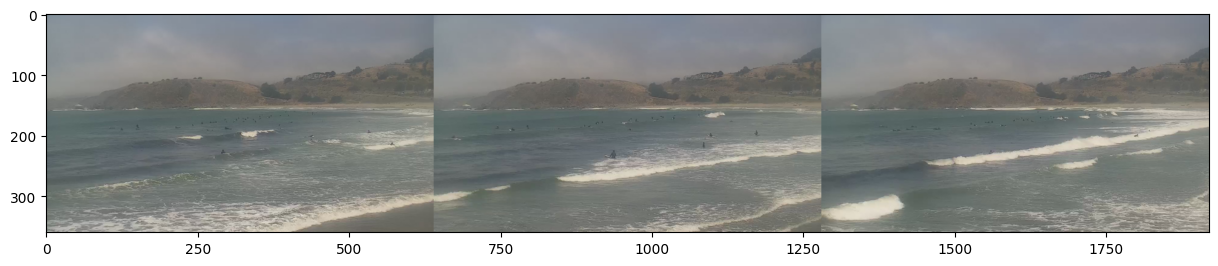

In [322]:
import matplotlib.pyplot as plt
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
fig, ax = plt.subplots(figsize=(15, 5))
plt.imshow(
    sample_data[0].transpose(0, 2).transpose(0, 1),
)
#plt.show()

In [323]:
sample_data = sample_data.to('mps')
sample_targets = sample_targets.to('mps')

In [324]:
print(
    f'Model prediction is : {model(sample_data).data.max(1)[1][0]}'
)
print(
    f'Ground truth is : {sample_targets[0]}'
)

Model prediction is : 1
Ground truth is : 1
